# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [23]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [24]:
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [25]:
import seaborn as sns
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [14, 39, 102]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

print ''
print ''

print 'Data mean'
display(data.mean().round())
print 'Data median'
display(data.median().round())

#sns.heatmap((samples-data.mean())/data.stf(ddof=0), annot=True, square=True, cbar=False)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  24653  9465    12091     294              5058          2168
1  56159   555      902   10002               212          2916
2   2932  6459     7677    2561              4573          1386



Data mean


Fresh               12000.0
Milk                 5796.0
Grocery              7951.0
Frozen               3072.0
Detergents_Paper     2881.0
Delicatessen         1525.0
dtype: float64

Data median


Fresh               8504.0
Milk                3627.0
Grocery             4756.0
Frozen              1526.0
Detergents_Paper     816.0
Delicatessen         966.0
dtype: float64

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
Customer segment 0 [Cluster 0] (index: 14) buys the most frozen foods and the least fresh foods and milk. This could be a retailer.

Customer segment 1 [Cluster 1] (index: 39) buys the most milk, grocery, detergents & paper, and delicatessen.This could be a restaurant, hotel, or cafe.

Customer segment 2 [Cluster 0] (index: 102) buys the most fresh foods and the least amount of groceries, frozen foods, detergents_paper, and delicatessen. This could be a grocery store.

***Customer Segment 0:***
-Relative to the mean, Customer segment 0 buys less Fresh food and Frozen food and more Milk, Groceries, Detergents and Paper, and Delicatessen. 
-Relative to the median, Customer segment 0 buys more Fresh food, Milk, and Detergents & Paper. And less groceries, frozen food, and delicatessen. 

Customer Segment 0 would most likely be a  

***Customer Segment 1:***
-Relative to the mean, customer segment 1 buys more fresh food, milk, detergents_paper, and delicatessen. And less groceries and frozen foods.
-Relative to the median, customer segment 1 buys more fresh food, milk, detergents & paper, and delicatessen. And less groceries.

Customer Segment 1 would most likely be a 

***Customer Segment 2:***
-Relative to the mean, customer segment 2 buys more Milk and Detergents & Paper. And less Fresh good, groceries, frozen food, and delicatessen. 
-Relative to the median, customer segment 2 buys more Milk, groceries, frozen food, Detergents & Paper, and Delicatessen. And less fresh food.

Customer Segment 2 would most likely be a


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [26]:
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score

f_array = data['Grocery']
new_data = data.drop(['Grocery'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(new_data, f_array, test_size=.25, random_state=40)

regressor = tree.DecisionTreeRegressor(max_depth =4, random_state=40)
regressor.fit(X_train, y_train)


pred = regressor.predict(X_test)
score = r2_score(y_test, pred)
print(score)

###################################


0.802309267739


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I attempted to predict on the feature set of groceries. When using a decision tree regressor to fit the data, I was able to gain an R^2 score of .802 which is relatively close to a perfect fit. This means that Grocery is a redundant feature that we can afford to drop without loss of information. The reason why we should drop features that are redudant is to reduce dimensionality for our machine learning model.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

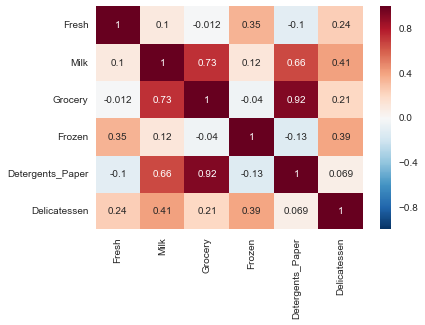

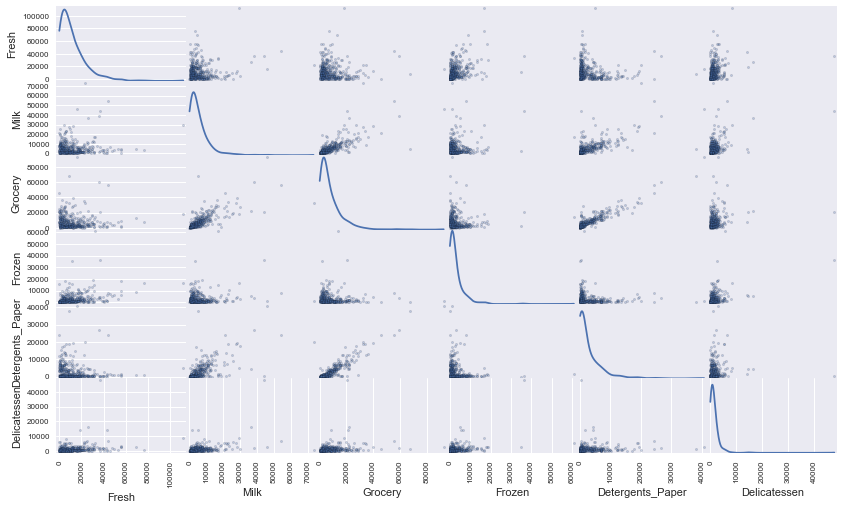

In [27]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Yes there are! Groceries and milk, groceries and detergents, and milk and detergents have some degree of a correlation. This supports my suspicions that Groceries is a redundant feature due to its strong correlation with milk and detergents. 

In terms of the features' distributions, based on the kernel density plots I would say that they are skewed to the right (positive).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

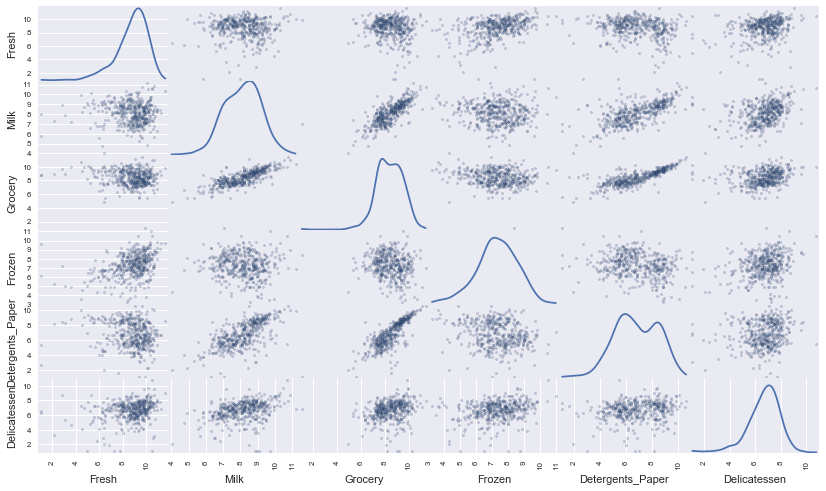

In [28]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [29]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  10.112654  9.155356  9.400217  5.683580          8.528726      7.681560
1  10.935942  6.318968  6.804615  9.210540          5.356586      7.977968
2   7.983440  8.773230  8.945984  7.848153          8.427925      7.234177

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [30]:
idx = []

for feature in log_data.keys():

    Q1 = np.percentile(log_data[feature], 25)
    Q3 = np.percentile(log_data[feature], 75)
    step = (Q3 - Q1)* 1.5
    
    print "Outliers: "
    idx += log_data[~((log_data[feature] >= Q1 - step) & (log_data
        [feature] <= Q3 + step))].index.tolist()
    
    print sorted({i for i in idx if idx.count(i) >1})

    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    display(outlier_points)
    display(step)
    
    
# OPTIONAL: Select the indices for data points you wish to remove
    
    outliers = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
good_data.describe()

Outliers: 
[]
Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

2.5335078686067929

Outliers: 
[]
Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

2.318248272818475

Outliers: 
[154]
Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

2.3988562137971394

Outliers: 
[65, 154]
Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

2.3493275010092116

Outliers: 
[65, 75, 154]
Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

4.0893587609383335

Outliers: 
[65, 66, 75, 128, 154]
Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

2.2422806544219394

Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  435.000000  435.000000  435.000000  435.000000        435.000000   
mean     8.766671    8.128376    8.460236    7.324601          6.799008   
std      1.423133    1.062911    1.046108    1.261038          1.684562   
min      1.098612    4.718499    5.384495    3.218876          1.098612   
25%      8.073389    7.364809    7.676010    6.647029          5.560615   
50%      9.055439    8.198089    8.467372    7.340187          6.700731   
75%      9.737108    8.877379    9.274768    8.177371          8.277644   
max     11.627601   11.205013   11.437986   11.016479         10.617099   

       Delicatessen  
count    435.000000  
mean       6.694349  
std        1.261066  
min        1.098612  
25%        6.019808  
50%        6.874198  
75%        7.509609  
max       10.777768

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** 
Yes, using a counter I found that indices 65, 66, 75, 128, & 154 are outliers. Therefore I added them to the outliers list to be removed. The reason why I removed them is because each index indentified using my counter was an outlier in more than one feature.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 0.44302505  0.70681723  0.82988103  0.93109011  0.97959207  1.        ]


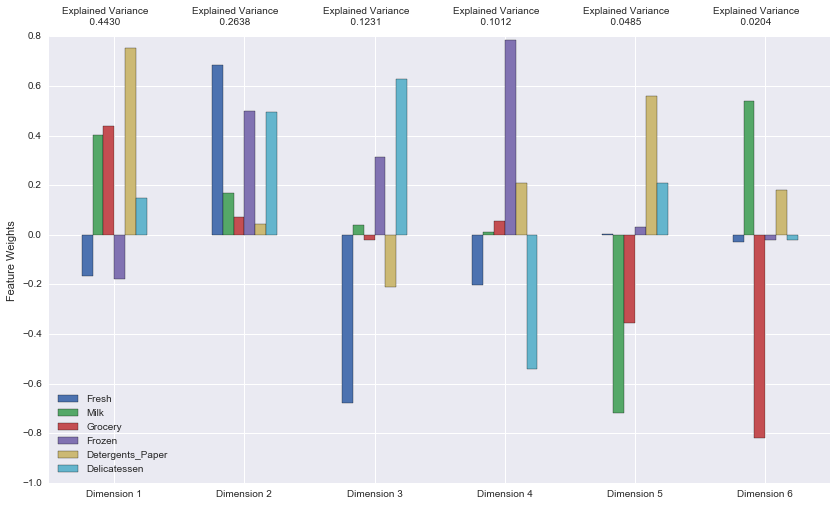

In [51]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print np.cumsum(pca.explained_variance_ratio_)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first principal component is made up of large positive weights in Milk, Groceries, & Detergents_Paper. This pattern may represent spending in household staple products that are purchased together.

The second principal component is made up of large positive weights in Fresh, Frozen, & Delicatessen. This pattern may represent spending for a grocery store.

The third principal component is made up of large positive weights for Frozen and Delicatessen and a large negative weight for Fresh. This could be represent spending for a deli/convenient store. 

The fourth principal component is made up of large positive weights for Frozen food and large negative weights for Delicatessen. 

The total variance for two dimensions was found to be 0.70681723 and for four dimensions to be 0.93109011.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [32]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       2.3388       0.9013      -1.1515      -1.6713       0.0485   
1      -3.0426       2.5854       0.1965      -0.0757       1.4213   
2       1.8145       0.2029       0.7064       0.6552       0.4010   

   Dimension 6  
0       0.0739  
1      -0.0093  
2       0.2483

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [43]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [46]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       2.3388       0.9013
1      -3.0426       2.5854
2       1.8145       0.2029

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K-Means clustering advantages:
1. If variables are huge, then K-Means most of the times computationally faster than hierarchical clustering, if we keep k smalls.
2. K-Means produce tighter clusters than hierachical clustering, especially if clusters are globular. 
Disadvantages: 
1. Difficult to predict K-value
2. With global cluster, it didn't work well
3. Different initial partitions can result in different final clusters
4. It does not work well with clusters of different size/density 

(source: playwidtech.blogspot.com)

Gaussian Mixture Model Clustering
Advantages: 
-GMM is alot more flexible in terms of cluster covariance
    -k-means is actually a special case of GMM in which each cluster's covariance along all dimensions approaches O. This implies that a point will get assigned only to the cluster closest to it. With GMM, each cluster can have unconstrained covariance structure. Think of rotated and/or elongated distribution of points in a cluster, instead of spherical as in k-means. As a result, cluster assignment is much more flexible in GMM than in K-means. 
- GMM model accommodates mixed membership
    -Another implication of its covariance strucure is that GMM allows for mixed membership of points to clusters. In KMeans, a point belongs to one and only one cluster, whereas in GMM a point belongs to each cluster to a different degree. The degree is based on the porbability of the point being generated from each cluster's (multivariate) normal distribution, with cluster center as the distributions meana nd cluster covariance as its covariance. Depending on the task, mixed membership may be more appropriate (e.g. news articles can belong to multiple topic clusters) or not (e.g. organisms can belong to only one species).
    
(source: quora.com)


Despite researching this definitions I am still not sure which algorithm I would be better off using for this dataset. Could you please help me with this problem?

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusterer = KMeans(n_clusters=2, random_state=30).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_

sample_preds = clusterer.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print("KMeans Score", score)
# Scores for various n_clusters inputs for KMeans
# 2 = 0.42628101546910835
# 3 = 0.39689092644980506
# 4 = 0.33135227312100696
# 5 = 0.34884687084126992
# 6 = 0.35602694564308268
# 7 = 0.36522226775891953
# 8 = 0.35013796505009648
# 9 = 0.36095553933642044
#10 = 0.34743819235342177


('KMeans Score', 0.42628101546910835)


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** Out of all the different cluster numbers I tried, choosing 2 clusters had the highest score.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

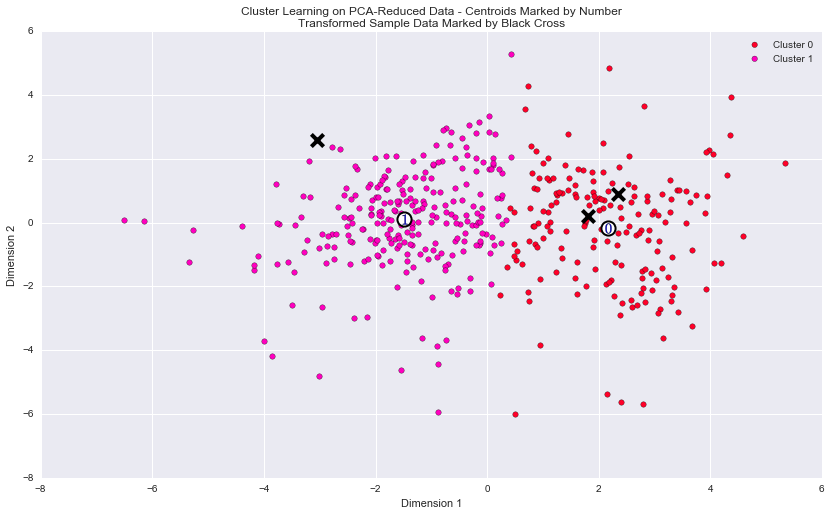

In [48]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


true centers


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  4005.0  7900.0  12104.0   952.0            4561.0        1036.0
Segment 1  8867.0  1897.0   2477.0  2088.0             294.0         681.0

Centers offset by mean


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0 -7995.0  2104.0   4153.0 -2120.0            1680.0        -489.0
Segment 1 -3133.0 -3899.0  -5474.0  -984.0           -2587.0        -844.0

Centers offset by median


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0 -4499.0  4273.0   7348.0  -574.0            3745.0          70.0
Segment 1   363.0 -1730.0  -2279.0   562.0            -522.0        -285.0

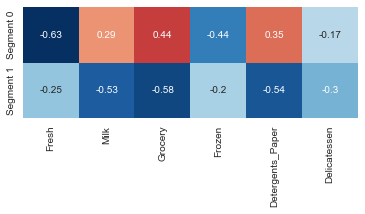

In [50]:
import seaborn as sns
log_centers = pca.inverse_transform(centers)

true_centers = np.exp(log_centers)

segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print 'true centers'
display(true_centers)

print 'Centers offset by mean'
display(true_centers - data.mean().round())

print 'Centers offset by median'
display(true_centers - data.median().round())

sns.heatmap((true_centers-data.mean())/data.std(ddof=1), annot=True, cbar=False, square=True)

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Between the two segments it seems like Segment 1 purchases a lot of fresh and frozen goods and relatively small amounts (in comparison to Segment 0) of detergents, milk, groceries, and delicatessen. Relative to the mean, Segment 1 purchases more than the average for every feature. Relative to the median, Segment 1 purchases more than the median for every feature.

In Segment 0 relative to Segment 1,customers purchase lots of grocery/milk/detergents/delicatessen and relatively less fresh and frozen food. Relative to the mean, Segment 0 orders more than the average of every feature. Relative to the median, Segment 0 orders more than the median of every feature.

Since these clusters divide the customers into two types, I would say that Segement 0 includes Grocery stores, supermarkets, etc. and Segment 1 includes food made for other customers (Restaurants, cafe's, etc.).

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [38]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Customer Segment", i, "predicted to be in Cluster", pred

Customer Segment 0 predicted to be in Cluster 0
Customer Segment 1 predicted to be in Cluster 1
Customer Segment 2 predicted to be in Cluster 0


**Answer:**
Question 1 Predictions: 

Customer segment 0 [Cluster 0] (index: 14) buys the most frozen foods and the least fresh foods and milk. This could be a frozen market. 

Customer segment 1 [Cluster 1] (index: 39) buys the most milk, grocery, detergents & paper, and delicatessen.This could be a wholesale store.

Customer segment 2 [Cluster 0] (index: 102) buys the most fresh foods and the least amount of groceries, frozen foods, detergents_paper, and delicatessen. This could be a grocery store for fresh foods.

Final Results:

My prediction in thinking that customer segment 0 is a market was correct.

My prediction in thinking that customer segement 1 is a wholesale store was incorrect. It would more likely be a restaurant or cafe. 

My prediction in thinking that customer segement 2 is a grocery store is correct.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Considering the fact that we can divide the customer types into two categories Segment 0 (food retail) and Segment 1 (restaurants), we could conduct useful A/B testing by taking a small sample of each Sample and seeing how they do on a 3-day per week schedule vs a 5-day per week schedule based on customer satisfaction. 

### Question 11 
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Assigning the 10 new customers to a cluster is essentially assigning each customer to a feature. This could be used as in the long run to determine customer preferences and behaviors. I would use the already available data and the segment assignments produced by GMM to train a new supervised learning model that predicts a given customer's segment by setting the features to the various different order options as before (Milk, Fresh, Frozen, etc.) and have the target variables be Cluster 0 and 1.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

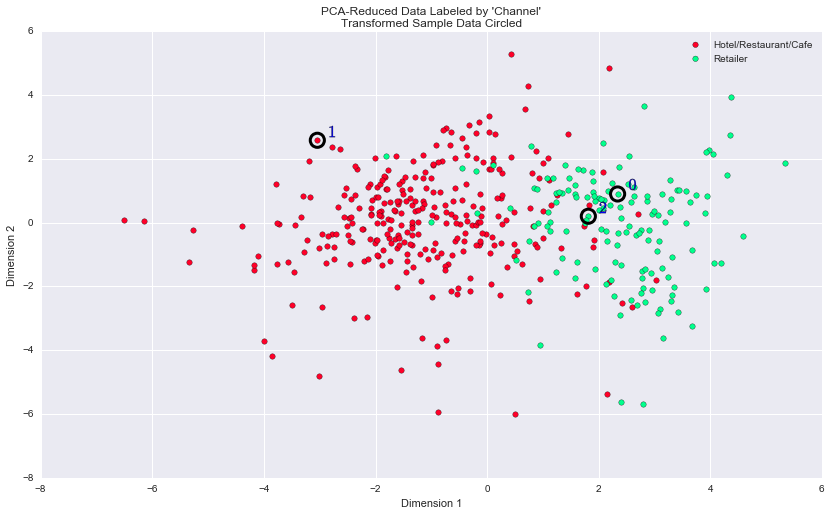

In [39]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The number of channels matches the number of clusters therefore I would consider these classifications as consistent with my previous definition of customer segments.

Although there is uncertainty between the two groups when they overlap, I still think the machine learning algorithm did a great job in dividing the customer segments. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.